# Linear Regression 2
### Import

In [66]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets

# mengimport package plotly
import plotly.express as px
import matplotlib.pyplot as plt

### Mempersiapkan Dataset

In [67]:
# membuat dataset dengan menggunakan sklearn
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

# mengkonversi dataset numpy ke tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
print(X.shape)

# reshape dataset menjadi 2 dimensi
y = y.view(y.shape[0], 1)

# memuat jumlah sample dan jumlah feature
n_samples, n_features = X.shape



torch.Size([100, 1])


In [68]:
# memplot dataset dengan plotly
fig = px.scatter(X_numpy, y_numpy)
fig.show()

### Menentukan Hyperparameter

In [69]:
# membuat model linear regression (inputsize, outputsize)
model = nn.Linear(n_features, 1)

# menentukan loss dan optimizer
learning_rate = 0.01
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Training

In [70]:
# mengiterasi model
num_epochs = 100

for epoch in range(num_epochs):
    # lakukan prediksi y dengan model dan inputan X
    y_predicted = model(X)

    # menghitung loss dari y yang diprediksi terhadap y yang sebenarnya
    loss = loss_fn(y_predicted, y)

    # menghitung gradient dari loss
    loss.backward()

    # mengupdate model
    optimizer.step()

    # mengosongkan gradient
    optimizer.zero_grad()

    # menampilkan loss
    if (epoch+1) % 10 == 0:
        print('Epoch {}/{} Loss: {}'.format(epoch+1, num_epochs, loss.item()))

Epoch 10/100 Loss: 4381.7138671875
Epoch 20/100 Loss: 3270.45556640625
Epoch 30/100 Loss: 2466.005859375
Epoch 40/100 Loss: 1883.0574951171875
Epoch 50/100 Loss: 1460.2166748046875
Epoch 60/100 Loss: 1153.2401123046875
Epoch 70/100 Loss: 930.197998046875
Epoch 80/100 Loss: 768.0194702148438
Epoch 90/100 Loss: 650.0144653320312
Epoch 100/100 Loss: 564.0975952148438


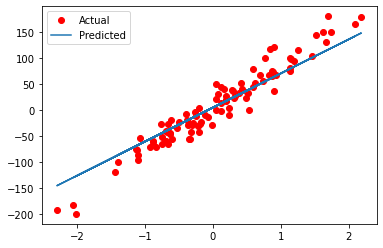

In [71]:
# mengplot hasil prediksi
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro', label='Actual')
plt.plot(X_numpy, predicted, label='Predicted')
plt.legend()
plt.show()